In [3]:
import numpy as np
import torch
from PIL import Image
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'cityscapesscripts'

In [5]:
file = '/Users/oscar/Downloads/gtFine_trainvaltest/gtFine/train/aachen/aachen_000000_000019_gtFine_instanceIds.png'

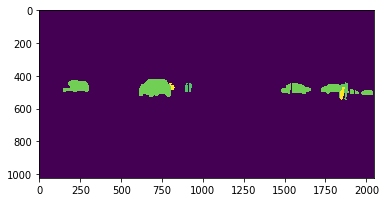

In [37]:
image = np.asarray(Image.open(file))

plt.imshow(image)

In [43]:
np.unique(image)

array([    0,     1,     3,     4,     7,     8,    11,    17,    20,
          21,    22,    23, 24000, 24001, 25000, 26003, 26004, 26005,
       26006, 26007, 26008, 26009, 26010, 33000, 33001], dtype=int32)

In [8]:
classes_with_instances = list(range(25,34))

In [9]:
xs, ys = np.where(image == 25000)
(np.floor(np.mean(xs)), np.floor(np.mean(ys)))

(485.0, 1865.0)

In [38]:
centroids = {}
for value in np.unique(image):
    xs, ys = np.where(image == value)
    centroids[value] = np.array((np.floor(np.mean(xs)), np.floor(np.mean(ys))))

In [46]:
target = np.zeros((image.shape[0], image.shape[1], 2))
for x in range(0,image.shape[0]):
    for y in range(0, image.shape[1]):
        if image[x, y] >= 24000:
            target[x, y, :] = np.array((x, y)) - centroids[image[x, y]]

-102.0
96.0
0.0
1.0


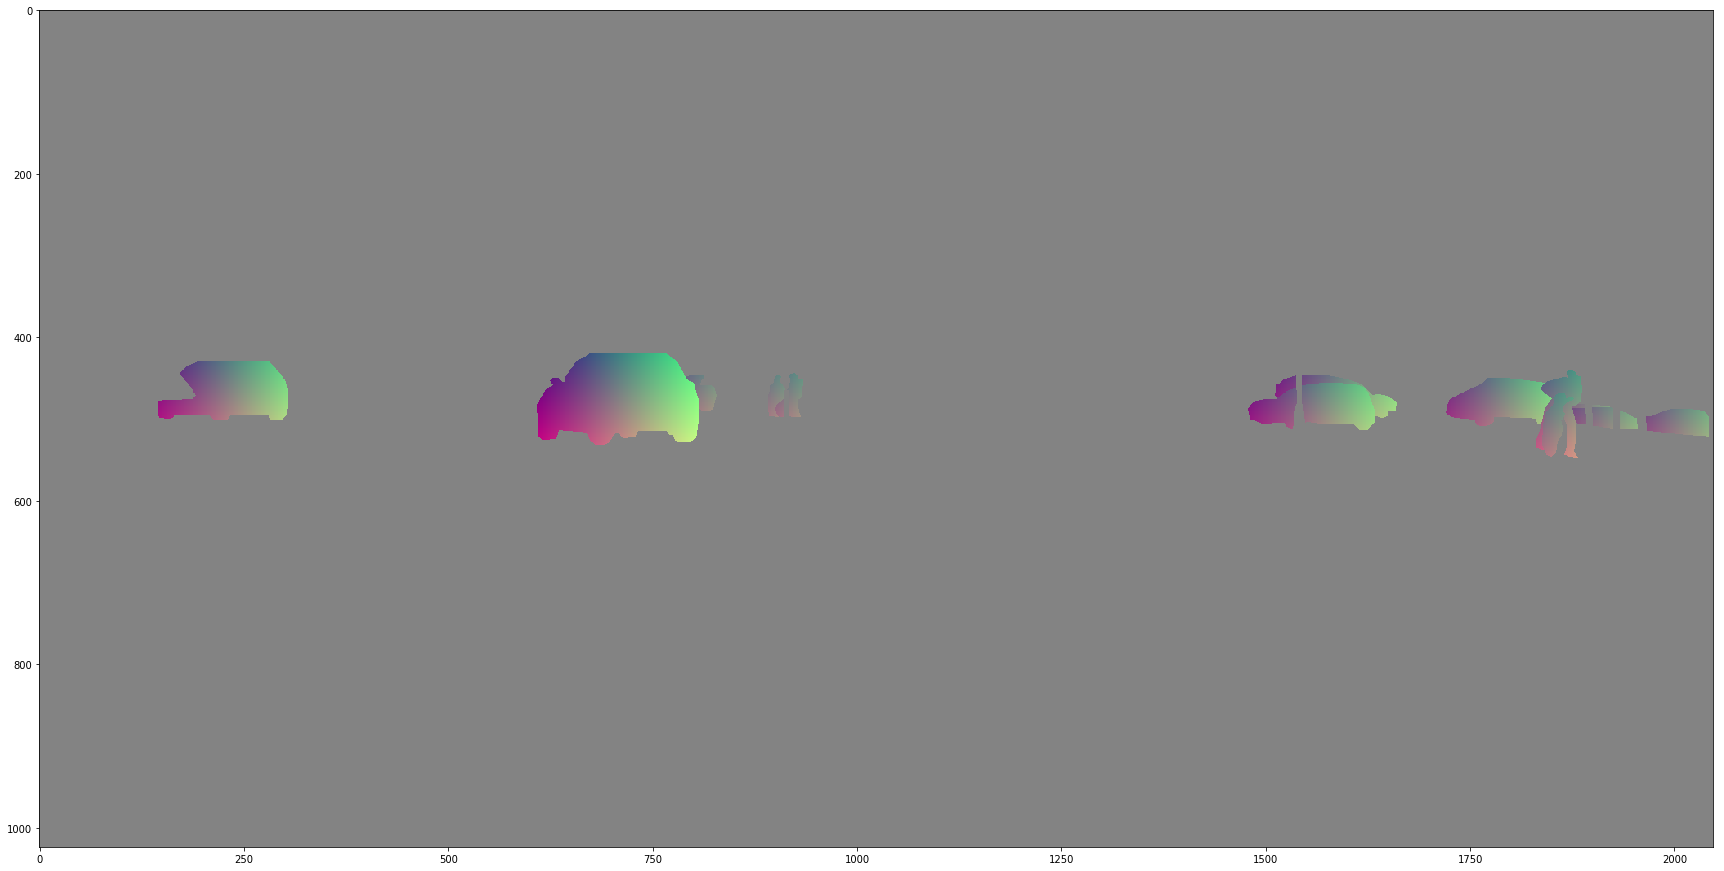

In [47]:
colour_t = np.zeros((target.shape[0], target.shape[1], 3))
colour_t[:,:,:2] = target
print(np.min(colour_t))
print(np.max(colour_t))
colour_t = colour_t - np.min(colour_t)
colour_t = colour_t / np.max(colour_t)
print(np.min(colour_t))
print(np.max(colour_t))
plt.figure(figsize=(30, 30))
plt.imshow(colour_t)

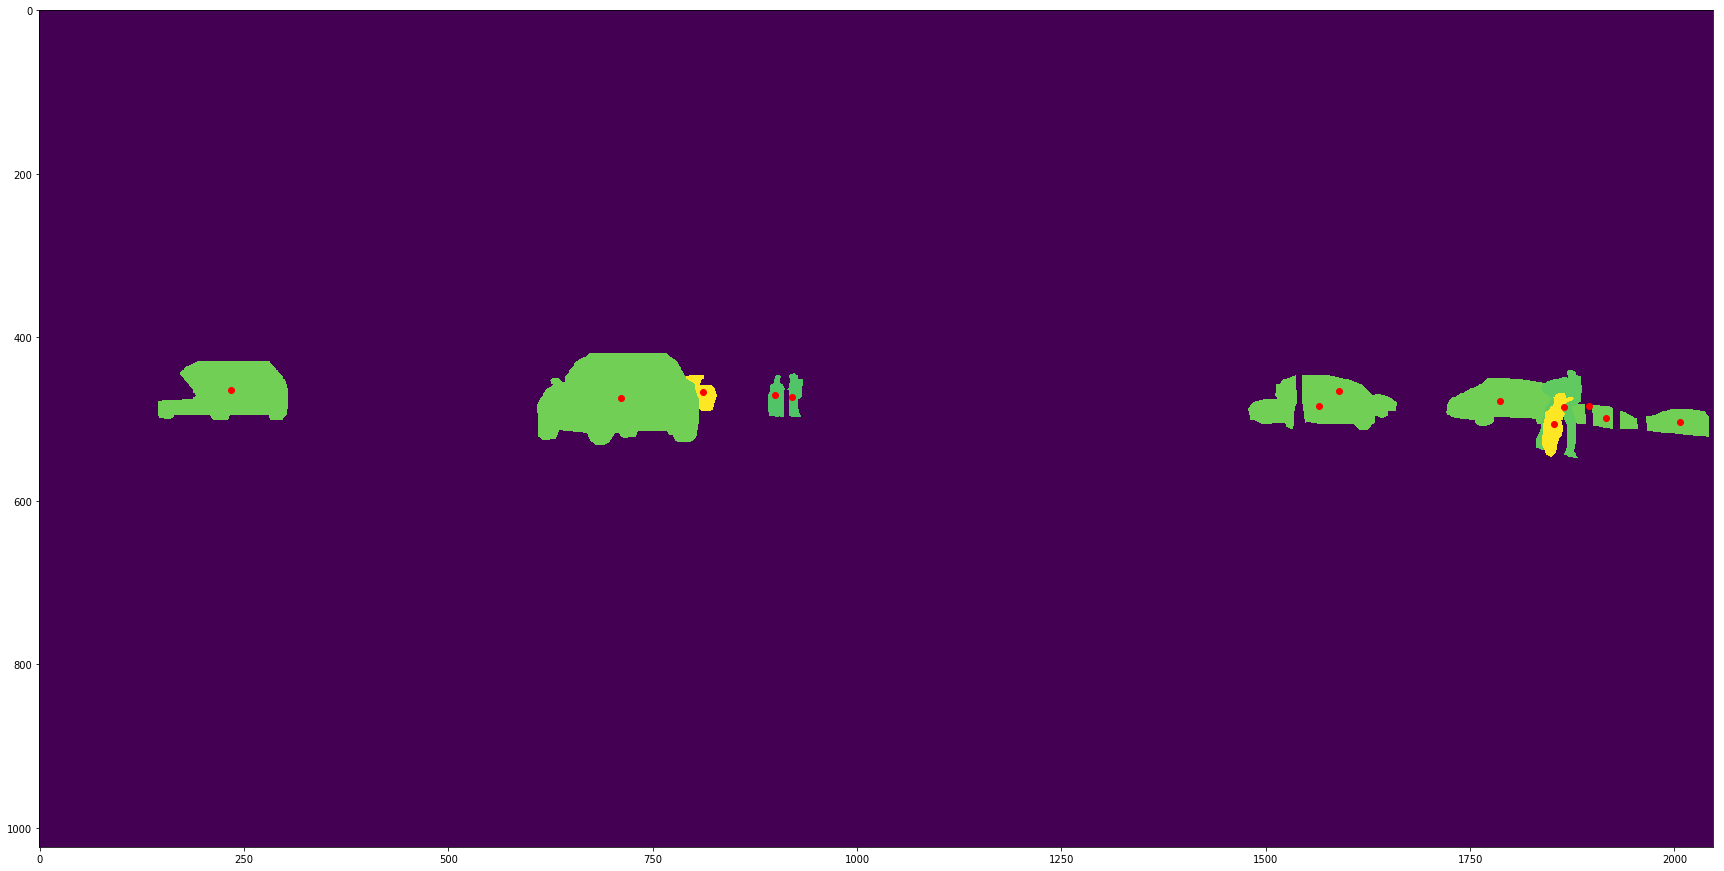

In [74]:
plt.figure(figsize=(30, 30))
plt.imshow(image)
centroids = [c for c in centroids if c[0] >= 24000]
plt.scatter([i[2] for i in centroids], [i[1] for i in centroids], c='r')


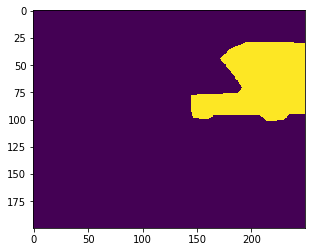

In [26]:
plt.imshow(np.image[400:600, 0:250])

In [27]:
crop = image[400:600, 0:250]
np.unique(crop, return_counts=True)


(array([    3,     7,    11,    17,    20,    21,    22, 26009],
       dtype=int32),
 array([ 1200,  4630,  5223,  3516,  8249,  1210, 20601,  5371]))

ValueError: assignment destination is read-only